## Методические указания по выполнению лабораторной работы №5

**Тема: Обучение модели YOLO на кастомном датасете и исследование влияния гиперпараметров на качество детекции**

**Цель работы:** Познакомиться с архитектурой YOLO на примере проверки гипотезы о релевантной метрике.

**Задачи:**

- Ознакомиться с архитектурой YOLO.
- Изучить метрики для анализа производительности модели, выбрать целевую метрику в соответствии с вариантом.
- Выбрать предметную область, сформировать гипотезу для проведения исследования.
- Собрать и проаннотировать данные, сформировать датасет.
- Провести fine-tuning предобученной модели YOLOv11 Nano/Small.
- Визуализировать и проанализировать результаты.
- На основе анализа сделать корректировку гиперпараметров/данных и провести вторую итерацию для повышения показателей.

### 1. Подготовка к обучению

#### 1.1 Метрики

Вариант 1 - Precision

Вариант 2 - Recall

Вариант 3 - F1 

Вариант 4 - mAP@0.5

Вариант 5 - mAP@0.75


#### 1.2 Гипотеза

Гипотеза должна отражать характер уклона исследования с обоснованием, отталкиваясь от предметной области. *Одна лишь констатация необходимости достижения высокого значения целевой метрики не является обоснованием*.

#### 1.3 Данные

Соберите не менее 500 изображений из открытых источников. Можно пользоваться готовыми наборами данных, но важно проверить качество: разрешение изображений, качество аннотаций, баланс классов. При самостоятельном сборе данных можете воспользоваться терминальной утилитой ffmpeg для нарезки видео на кадры и любым удобным инструментом аннотирования (Roboflow, CVAT и тд). 

#### 1.4 Предобработка

Примените методы аугментации к данным для расширения объема датасета для получения 1.5-2к изображений. Подготовьте данные к требуемому формату для обучающего процесса.

#### 1.5 Вариант

Вариант 4 - mAP@0.5


### 2. Обучение модели

#### 2.1 Подготовка окружения

Установите зависимости и библиотеки:

In [1]:
%pip install -U ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.140 🚀 Python-3.12.9 torch-2.6.0+cu124 CPU (AMD Ryzen 5 3600 6-Core Processor)
Setup complete ✅ (12 CPUs, 15.5 GB RAM, 119.2/210.1 GB disk)


In [2]:
# !pip install -U ipywidgets

import numpy as np 
import pandas as pd

import os

from matplotlib import pyplot as plt
from PIL import Image
from ultralytics import YOLO


#### 2.2 Подготовка модели

Загрузите предобученную модель, определите устройство, переведите модель в режим инференса. Не используйте размер модели больше чем Small для достижения лучших показателей на стандартных гиперпараметрах (особенно imgsz)

In [3]:
#импорт модели
model = YOLO("yolo11n.pt")
# img="/kaggle/input/augumented-underwater-objects/test/images/IMG_2288_jpeg_jpg.rf.893035b1b07e50aa149778a94461d5a1.jpg"
img = "dataset/test/images/IMG_2288_jpeg_jpg.rf.893035b1b07e50aa149778a94461d5a1.jpg"
model.predict(img)[0].show()


image 1/1 /home/sypoo/mtuci/nn/lab5/dataset/test/images/IMG_2288_jpeg_jpg.rf.893035b1b07e50aa149778a94461d5a1.jpg: 640x640 1 bird, 82.9ms
Speed: 2.1ms preprocess, 82.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


#### 2.3 Загрузка и предобработка изображений


Затем импортируйте датасет в проект и выполните трансформацию данных (при использовании Roboflow трансформация выполняется на этапе предобработки):

In [5]:
# загрузка датасета
# dataset_path : /kaggle/input/augumented-underwater-objects
# link to dataset: https://www.kaggle.com/datasets/rustamshamsutdinov/augumented-underwater-objects

# метод трансформации


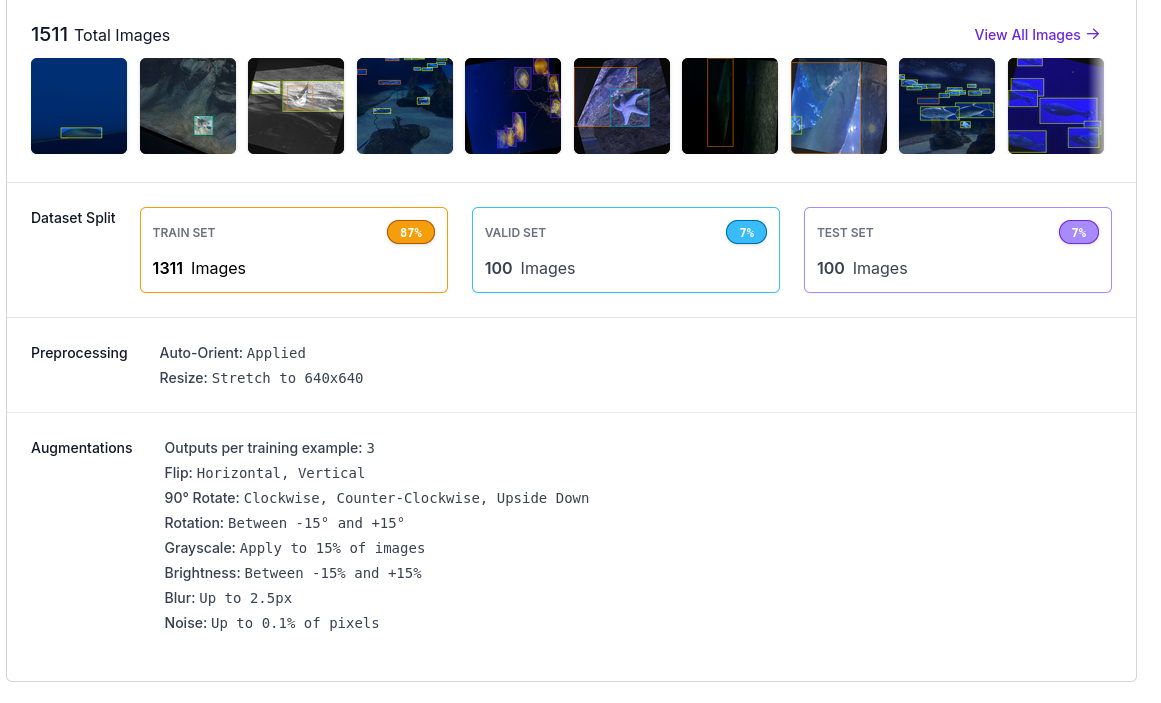

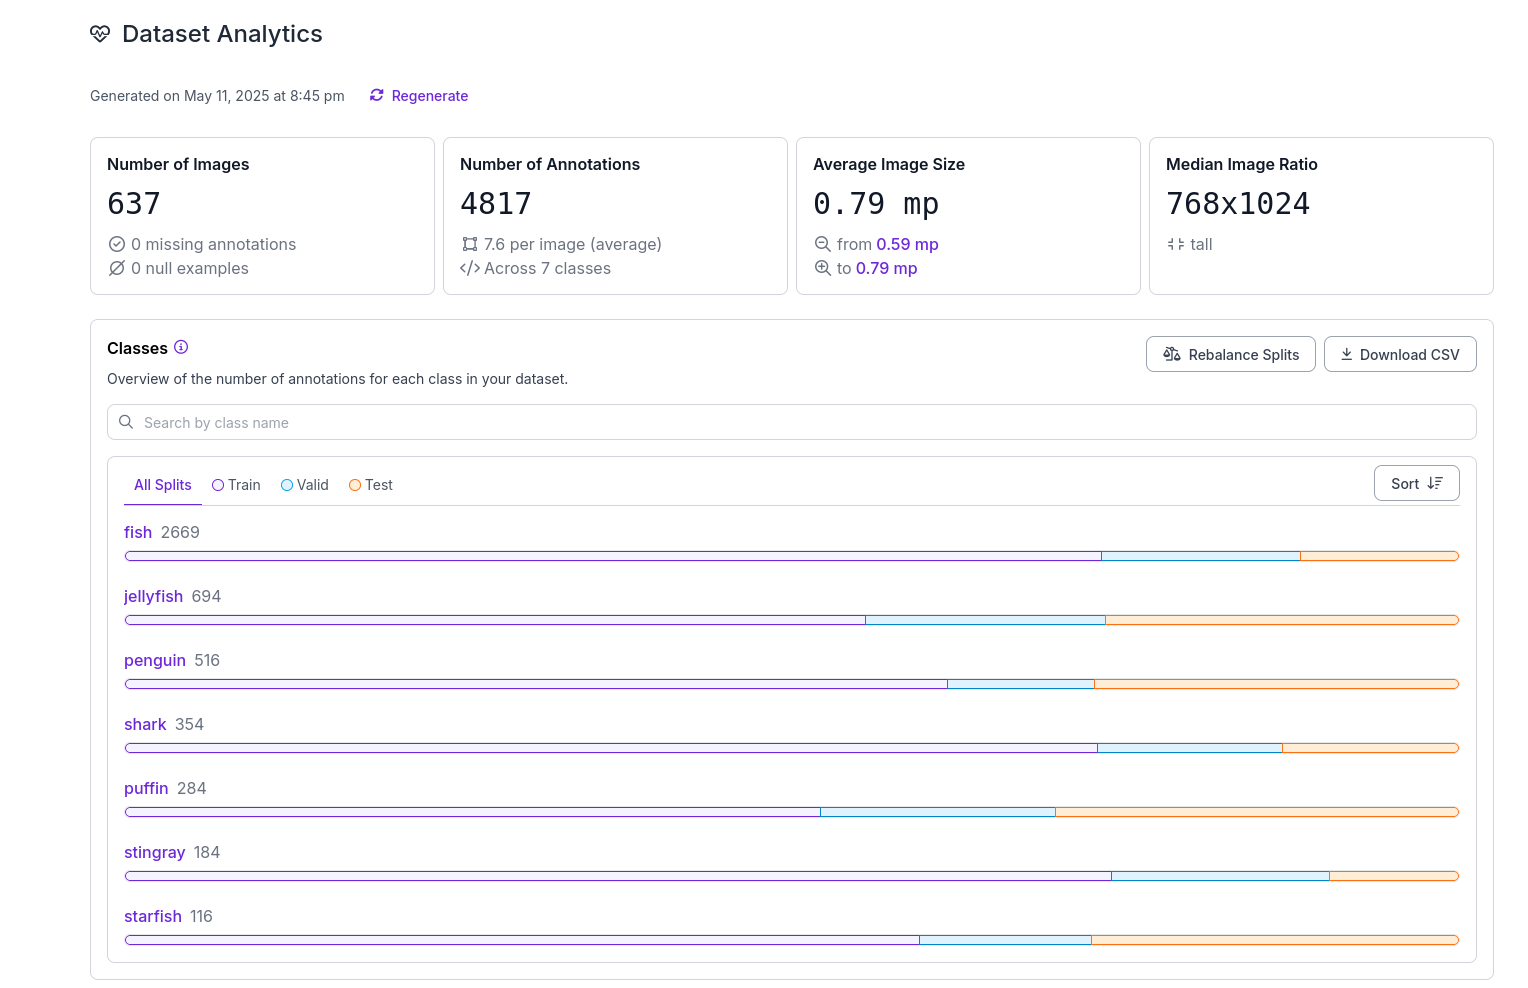

Пример аугументированного изображения

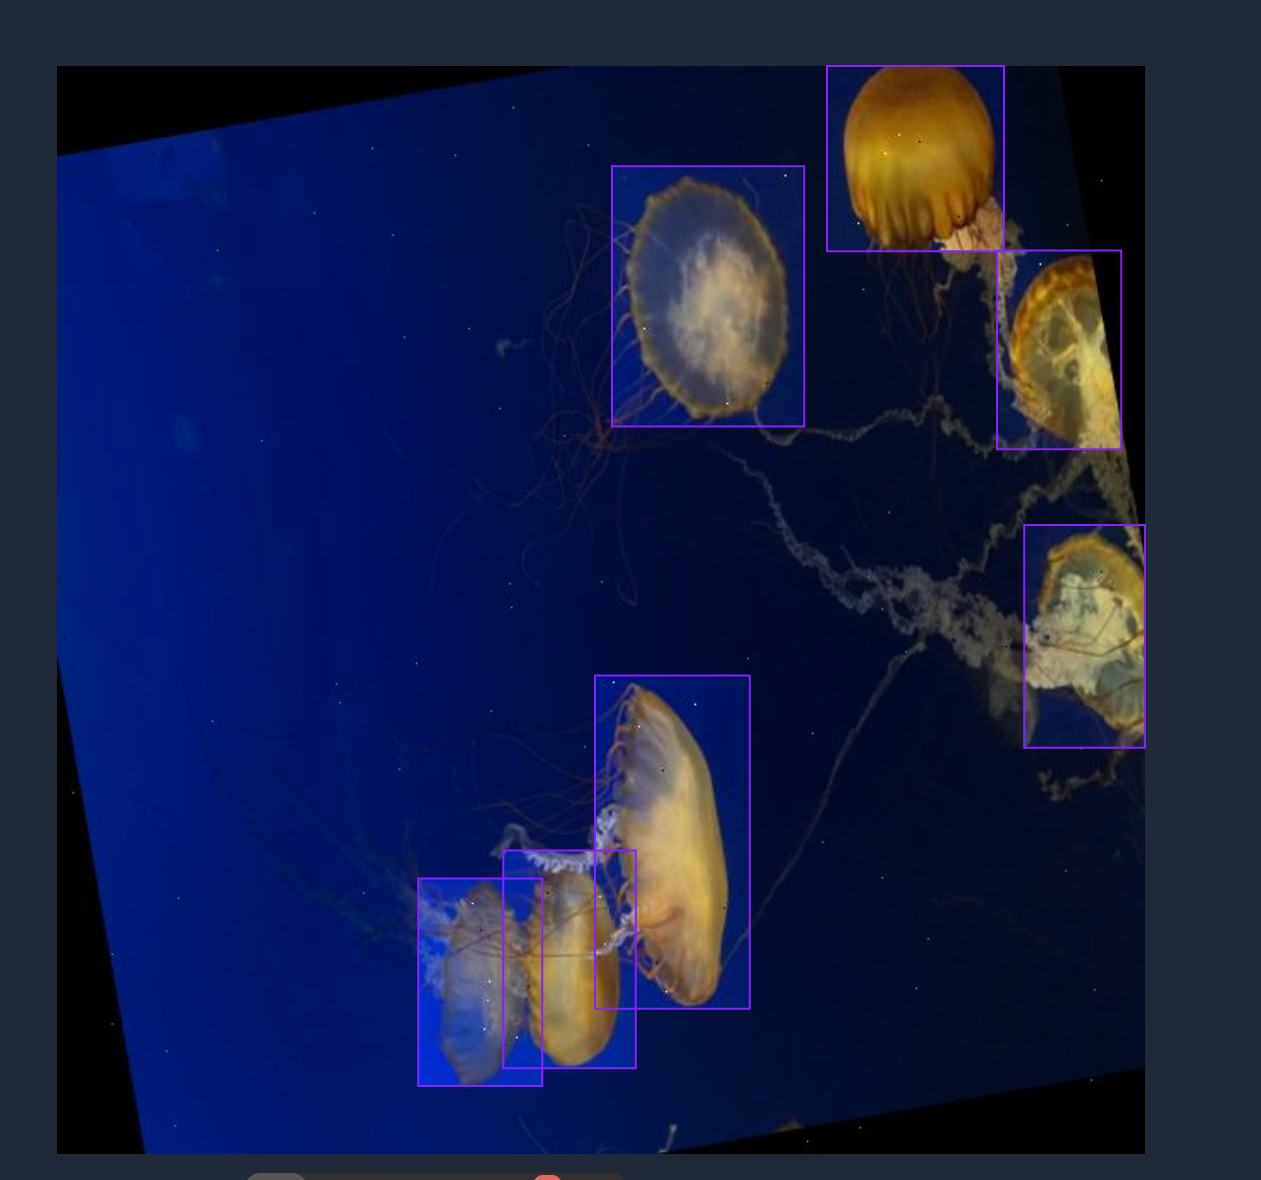

#### 2.4 Обучение, оценка модели и визуализация результатов

Проведите обучение модели, проанализируйте кривые обучения, метрики и тестовые данные. Сделайте вывод и корректироваки для достижения лучших показателей

engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, project=None, rect=False, resume=False, retina_masks=False, save=True, save_conf=False, save_crop=False, save_dir=/home/sypoo/mtuci/nn/lab5/runs/detect/train, save_frames=False, save_json=False, save_period=-1, save_txt=False, scale=0.5, seed=0, shear=0.0, show=False, show_boxes=True, show_conf=True, show_labels=True, simplify=True, single_cls=False, source=None, split=val, stream_buffer=False, task=detect, time=None, tracker=botsort.yaml, translate=0.1, val=True, verbose=True, vid_stride=1, visualize=False, warmup_bias_lr=0.1, warmup_epochs=3.0, warmup_momentum=0.8, weight_decay=0.0005, workers=8, workspace=None


In [6]:
# Test local train
# data_kaggel_path = "/kaggle/input/augumented-underwater-objects/data.yaml"
data_local_path = "dataset/data.yaml"
# results = model.train(data=data_kaggel_path, epochs=30, imgsz=640, plots=True)
test_results = model.train(data=data_local_path, epochs=1, imgsz=640, plots=True, save=True)

Ultralytics 8.3.140 🚀 Python-3.12.9 torch-2.6.0+cu124 CPU (AMD Ryzen 5 3600 6-Core Processor)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=T

train: Scanning /home/sypoo/mtuci/nn/lab5/dataset/train/labels.cache... 1311 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1311/1311 [00:00<?, ?it/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2804.5±791.6 MB/s, size: 69.4 KB)



val: Scanning /home/sypoo/mtuci/nn/lab5/dataset/valid/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

Plotting labels to /home/sypoo/mtuci/nn/runs/detect/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /home/sypoo/mtuci/nn/runs/detect/train
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G      2.667       4.12      2.377        130        640: 100%|██████████| 82/82 [06:05<00:00,  4.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:14<00:00,  3.51s/it]


                   all        100        723      0.848     0.0253     0.0639     0.0327

1 epochs completed in 0.106 hours.
Optimizer stripped from /home/sypoo/mtuci/nn/runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from /home/sypoo/mtuci/nn/runs/detect/train/weights/best.pt, 5.5MB

Validating /home/sypoo/mtuci/nn/runs/detect/train/weights/best.pt...
Ultralytics 8.3.140 🚀 Python-3.12.9 torch-2.6.0+cu124 CPU (AMD Ryzen 5 3600 6-Core Processor)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.64s/it]


                   all        100        723      0.848     0.0254     0.0639     0.0327
                  fish         54        397      0.217      0.116     0.0892     0.0343
             jellyfish          7        125       0.72     0.0618      0.301      0.164
               penguin         11         57          1          0     0.0047    0.00102
                puffin         11         50          1          0    0.00181   0.000982
                 shark         23         49          1          0    0.00449    0.00245
              starfish         10         15          1          0    0.00835    0.00386
              stingray         20         30          1          0     0.0376     0.0225
Speed: 3.1ms preprocess, 88.7ms inference, 0.0ms loss, 8.1ms postprocess per image
Results saved to /home/sypoo/mtuci/nn/runs/detect/train


In [19]:

path_to_best_model = f"{test_results.save_dir}/weights/best.pt"
best_model = YOLO(path_to_best_model)
img = "dataset/test/images/IMG_2288_jpeg_jpg.rf.893035b1b07e50aa149778a94461d5a1.jpg"
best_model.predict(img)[0].show()


image 1/1 /home/sypoo/mtuci/nn/lab5/dataset/test/images/IMG_2288_jpeg_jpg.rf.893035b1b07e50aa149778a94461d5a1.jpg: 640x640 (no detections), 57.0ms
Speed: 1.2ms preprocess, 57.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# обучение, оценка, визуализация
data_kaggel_path = "/kaggle/input/augumented-underwater-objects/data.yaml"
results = model.train(data=data_kaggel_path, epochs=30, imgsz=640, plots=True)


Ultralytics 8.3.131 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/augumented-underwater-objects/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train23, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=

train: Scanning /kaggle/input/augumented-underwater-objects/train/labels... 1311 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1311/1311 [00:02<00:00, 626.53it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/augumented-underwater-objects/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.1±0.3 ms, read: 111.3±23.0 MB/s, size: 69.4 KB)


val: Scanning /kaggle/input/augumented-underwater-objects/valid/labels... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 572.54it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/augumented-underwater-objects/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train23/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train23
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.87G      1.868      2.099      1.529        142        640: 100%|██████████| 82/82 [00:15<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]

                   all        100        723      0.547      0.574      0.554      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      3.23G       1.83      1.967      1.495        138        640: 100%|██████████| 82/82 [00:14<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]

                   all        100        723      0.576      0.467      0.516      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      3.23G      1.866      2.008      1.516        170        640: 100%|██████████| 82/82 [00:14<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]

                   all        100        723      0.477      0.539      0.501      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      3.23G      1.837      1.988      1.499        163        640: 100%|██████████| 82/82 [00:14<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.81it/s]

                   all        100        723      0.562      0.527       0.56      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      3.45G        1.8      1.869      1.466        147        640: 100%|██████████| 82/82 [00:14<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]

                   all        100        723      0.571      0.521      0.544      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      3.45G      1.798      1.838      1.463        187        640: 100%|██████████| 82/82 [00:14<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]

                   all        100        723      0.571      0.609      0.602      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      3.45G      1.781      1.791      1.449        141        640: 100%|██████████| 82/82 [00:14<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.20it/s]

                   all        100        723      0.653      0.617      0.662      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      3.45G      1.734      1.717      1.418        152        640: 100%|██████████| 82/82 [00:14<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.30it/s]

                   all        100        723      0.693      0.603      0.623      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      3.45G      1.724      1.724      1.423        135        640: 100%|██████████| 82/82 [00:14<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]

                   all        100        723      0.675      0.587      0.644      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      3.45G      1.714      1.687      1.407        150        640: 100%|██████████| 82/82 [00:14<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]

                   all        100        723      0.665      0.636      0.666      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      3.45G      1.691      1.643      1.391        179        640: 100%|██████████| 82/82 [00:14<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.51it/s]

                   all        100        723      0.704      0.626      0.691       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      3.45G       1.68      1.606      1.384         95        640: 100%|██████████| 82/82 [00:14<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]

                   all        100        723      0.718      0.586      0.666      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      3.45G      1.677      1.574      1.373        152        640: 100%|██████████| 82/82 [00:14<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.20it/s]

                   all        100        723      0.668      0.654      0.676       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      3.45G      1.659      1.564      1.364        150        640: 100%|██████████| 82/82 [00:14<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]

                   all        100        723      0.665      0.625      0.656      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      3.45G      1.642      1.535      1.363        146        640: 100%|██████████| 82/82 [00:14<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.19it/s]

                   all        100        723      0.726      0.601      0.685      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      3.45G      1.678      1.519      1.371        248        640: 100%|██████████| 82/82 [00:14<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.36it/s]

                   all        100        723      0.665      0.678      0.708      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      3.45G      1.635      1.479       1.36        185        640: 100%|██████████| 82/82 [00:14<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]

                   all        100        723       0.75      0.635      0.728      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      3.45G      1.634      1.485      1.342        232        640: 100%|██████████| 82/82 [00:14<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.27it/s]

                   all        100        723      0.735      0.629      0.713      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      3.45G      1.618      1.465      1.339         98        640: 100%|██████████| 82/82 [00:14<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

                   all        100        723      0.692      0.698       0.72      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      3.45G      1.616      1.431      1.333        142        640: 100%|██████████| 82/82 [00:14<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]

                   all        100        723      0.715      0.661      0.709      0.402


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      3.45G      1.567      1.372      1.339         84        640: 100%|██████████| 82/82 [00:14<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.09it/s]

                   all        100        723      0.721      0.672        0.7      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      3.45G      1.539      1.316      1.314         95        640: 100%|██████████| 82/82 [00:14<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.14it/s]

                   all        100        723      0.729      0.682      0.739       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      3.45G      1.504      1.274       1.29         86        640: 100%|██████████| 82/82 [00:14<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]

                   all        100        723      0.792      0.619      0.725      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      3.45G      1.521      1.272        1.3         88        640: 100%|██████████| 82/82 [00:14<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.34it/s]

                   all        100        723      0.674      0.741      0.738      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.45G        1.5      1.239      1.291         99        640: 100%|██████████| 82/82 [00:14<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]

                   all        100        723      0.739      0.656      0.719      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.45G      1.495      1.235      1.282         82        640: 100%|██████████| 82/82 [00:14<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.18it/s]

                   all        100        723      0.726      0.676      0.734      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.45G      1.468      1.214      1.277        101        640: 100%|██████████| 82/82 [00:14<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.35it/s]

                   all        100        723      0.737      0.688      0.736      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.45G      1.479      1.222      1.278         62        640: 100%|██████████| 82/82 [00:14<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.13it/s]

                   all        100        723      0.698      0.686      0.733      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.45G       1.45      1.186       1.25         76        640: 100%|██████████| 82/82 [00:14<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.30it/s]

                   all        100        723      0.679      0.717      0.741      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.45G      1.462      1.179      1.268         95        640: 100%|██████████| 82/82 [00:14<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]

                   all        100        723      0.694      0.726      0.744      0.441



30 epochs completed in 0.130 hours.
Optimizer stripped from runs/detect/train23/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train23/weights/best.pt, 5.5MB

Validating runs/detect/train23/weights/best.pt...
Ultralytics 8.3.131 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]


                   all        100        723      0.681      0.715      0.741      0.444
                  fish         54        397      0.789      0.693      0.778      0.427
             jellyfish          7        125      0.637       0.88      0.846      0.476
               penguin         11         57      0.509      0.655      0.611      0.275
                puffin         11         50      0.559        0.5      0.501      0.239
                 shark         23         49      0.664      0.612       0.68      0.425
              starfish         10         15      0.887      0.867      0.948      0.685
              stingray         20         30      0.719        0.8      0.822      0.581


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/detect/train23


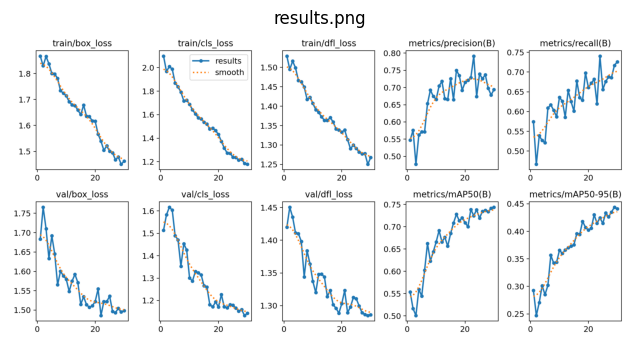

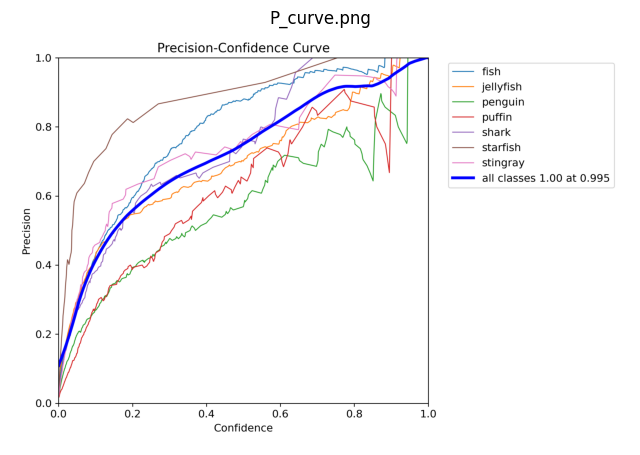

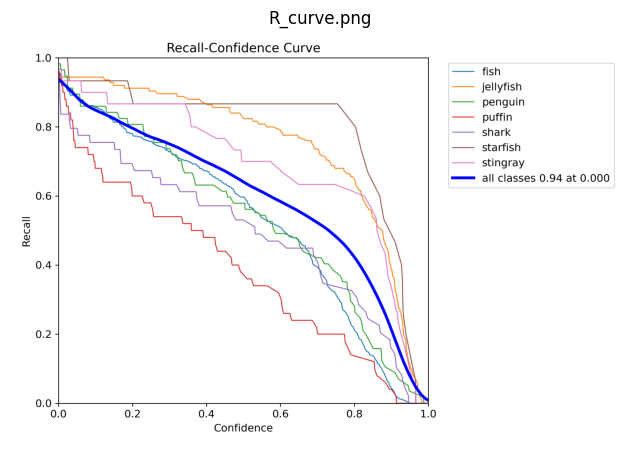

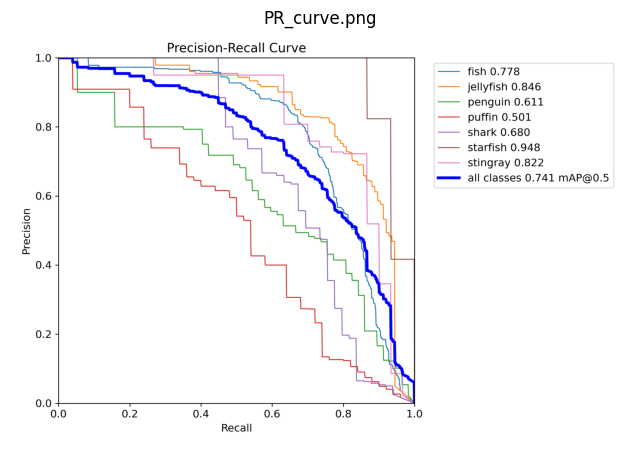

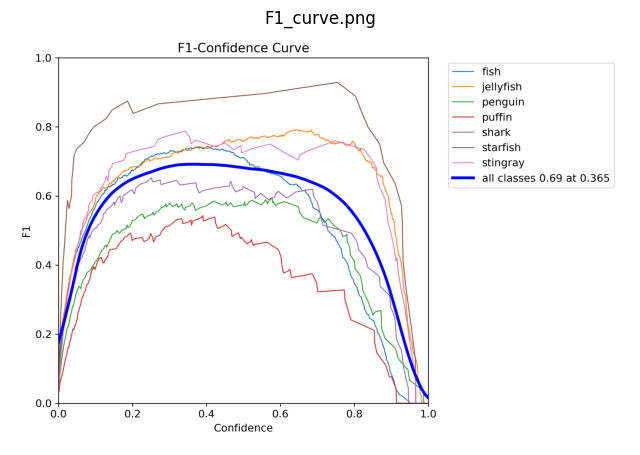

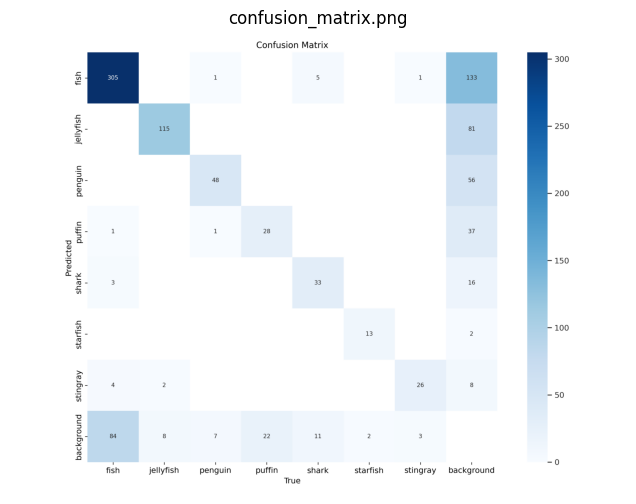

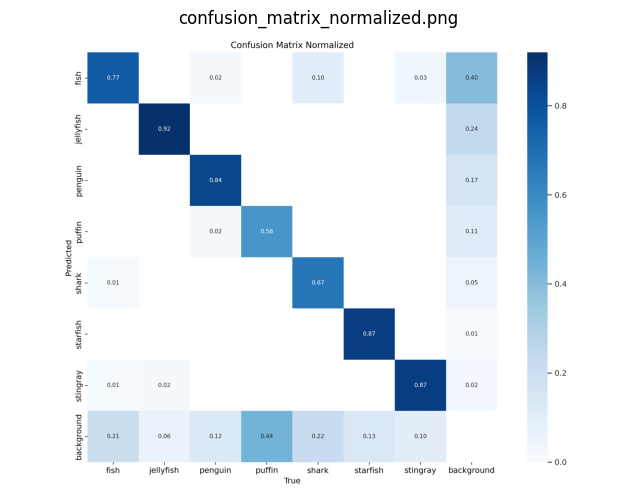

In [45]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Папка с результатами тренировки
save_dir = "/kaggle/working/runs/detect/train23"

# Список файлов, которые хотим отобразить
files = [
    "results.png",                  # общая сводка (loss, mAP50, mAP@[.5:.95])
    "P_curve.png",                  # precision по классам
    "R_curve.png",                  # recall по классам
    "PR_curve.png",                 # суммарная PR-кривая
    "F1_curve.png",                 # F1-кривая
    "confusion_matrix.png",         # матрица ошибок
    "confusion_matrix_normalized.png"  # нормализованная матрица ошибок (если есть)
]

for fname in files:
    path = os.path.join(save_dir, fname)
    if os.path.exists(path):
        img = Image.open(path)
        plt.figure(figsize=(8, 6))
        plt.title(fname)
        plt.imshow(img)
        plt.axis("off")
        plt.show()
    else:
        print(f"⚠️ Файл не найден: {fname}")


#### 2.5 Вторая итерация

Проведите процедуры для достижения высоких показателей (корректировка данных/гиперпараметров), сделайте вывод


In [47]:


model = YOLO("yolo11n.pt")
results = model.train(
    # Данные
    data           = "/kaggle/input/augumented-underwater-objects/data.yaml",

    # Обучение
    epochs         = 30,
    batch          = -1,                # auto‐подбор ~60% GPU
    imgsz          = [480, 800],
    rect           = True,
    cache          = "ram",

    # Аугментации (поддерживаемые настройки)
    multi_scale    = True,
    mosaic         = 0.7,               # вероятность 70%
    mixup          = 0.5,               # вероятность 50%
    close_mosaic   = 20,
    hsv_h          = 0.5,
    hsv_s          = 0.5,
    hsv_v          = 0.5,
    flipud         = True,
    fliplr         = True,              # всё это описано в разделе Data Augmentations :contentReference[oaicite:2]{index=2}

    # LR & шедулер
    optimizer      = "AdamW",
    lr0            = 0.02,
    lrf            = 0.01,
    cos_lr         = True,
    warmup_epochs  = 7.0,
    warmup_momentum= 0.85,
    warmup_bias_lr = 0.1,
    momentum       = 0.937,
    weight_decay   = 0.0007,

    # Регуляризация
    freeze         = 3,
    patience       = 40,
    amp            = True,

    # Сохранение
    save           = True,
    save_period    = 1
)


Ultralytics 8.3.131 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=ram, cfg=None, classes=None, close_mosaic=20, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/kaggle/input/augumented-underwater-objects/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=True, flipud=True, format=torchscript, fraction=1.0, freeze=3, half=False, hsv_h=0.5, hsv_s=0.5, hsv_v=0.5, imgsz=[480, 800], int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.02, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.5, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=0.7, multi_scale=True, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=40, perspective=0.0, plots=T

train: Scanning /kaggle/input/augumented-underwater-objects/train/labels... 1311 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1311/1311 [00:01<00:00, 703.24it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/augumented-underwater-objects/train is not writeable, cache not saved.


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (2.3GB RAM): 100%|██████████| 1311/1311 [00:02<00:00, 437.98it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


AutoBatch: Computing optimal batch size for imgsz=800 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 1.09G reserved, 0.36G allocated, 13.29G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     2591205       10.07         0.696         27.41         98.87        (1, 3, 800, 800)                    list
     2591205       20.15         0.870         28.08         90.67        (2, 3, 800, 800)                    list
     2591205       40.29         1.212         28.27         88.55        (4, 3, 800, 800)                    list
     2591205       80.59         2.015         47.13          90.9        (8, 3, 800, 800)                    list
     2591205       161.2         3.649         69.43         99.68       (16, 3, 800, 800)                    list
AutoBatch: Using batch-size 38 for CUDA:0 9.43G/14.74G (64%) ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 94.3±49.6 MB/s, siz

train: Scanning /kaggle/input/augumented-underwater-objects/train/labels... 1311 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1311/1311 [00:01<00:00, 1138.40it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/augumented-underwater-objects/train is not writeable, cache not saved.


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (2.3GB RAM): 100%|██████████| 1311/1311 [00:02<00:00, 443.68it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
WARNING ⚠️ 'rect=True' is incompatible with DataLoader shuffle, setting shuffle=False


val: Fast image access ✅ (ping: 1.3±0.7 ms, read: 85.2±29.4 MB/s, size: 49.7 KB)


val: Scanning /kaggle/input/augumented-underwater-objects/valid/labels... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 617.52it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/augumented-underwater-objects/valid is not writeable, cache not saved.


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.2GB RAM): 100%|██████████| 100/100 [00:00<00:00, 198.35it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: AdamW(lr=0.02, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.00083125), 87 bias(decay=0.0)
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      14.5G      2.191      4.254      1.976        393        608: 100%|██████████| 35/35 [00:23<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.48s/it]

                   all        100        723          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      13.6G      2.591      4.171      2.394        384       1120: 100%|██████████| 35/35 [00:19<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all        100        723          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      14.5G      2.496      4.114        2.4        394        960: 100%|██████████| 35/35 [00:20<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all        100        723          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      13.8G      2.487      4.122      2.425        403        864: 100%|██████████| 35/35 [00:22<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all        100        723   0.000558    0.00036   0.000123   1.23e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      12.6G      2.468      4.011      2.451        371        608: 100%|██████████| 35/35 [00:21<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.18s/it]

                   all        100        723      0.144     0.0416   0.000882   0.000336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      14.3G      2.434      3.958      2.391        359        480: 100%|██████████| 35/35 [00:22<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.36s/it]

                   all        100        723      0.166      0.055     0.0124    0.00483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30        14G      2.425      3.786      2.609        421       1216:   3%|▎         | 1/35 [00:01<00:48,  1.43s/it]

WARNING ⚠️ CUDA OutOfMemoryError in TaskAlignedAssigner, using CPU


       7/30      12.4G      2.428      3.812       2.32        393        864: 100%|██████████| 35/35 [00:27<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.38s/it]

                   all        100        723      0.155       0.18      0.011    0.00345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      14.1G      2.371      3.752      2.266        389        928: 100%|██████████| 35/35 [00:21<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.09s/it]

                   all        100        723       0.32     0.0617     0.0138    0.00485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      14.1G      2.322      3.663      2.244        392        960: 100%|██████████| 35/35 [00:20<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.26s/it]

                   all        100        723      0.157      0.114      0.011     0.0041



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30        13G      2.251       3.54      2.178        391        736: 100%|██████████| 35/35 [00:19<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]

                   all        100        723     0.0121      0.268     0.0167    0.00571


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      14.4G      2.217      3.483      2.166        400        608: 100%|██████████| 35/35 [00:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.15s/it]

                   all        100        723      0.189      0.107     0.0336     0.0123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      9.45G      2.204      3.394      2.078        383        480: 100%|██████████| 35/35 [00:19<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all        100        723     0.0414       0.12     0.0284     0.0116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      14.1G      2.178      3.361      2.144        396        992: 100%|██████████| 35/35 [00:22<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all        100        723      0.189      0.164     0.0416     0.0163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      13.3G      2.168      3.355       2.07        390       1216: 100%|██████████| 35/35 [00:22<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all        100        723      0.231      0.111     0.0559     0.0244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      13.9G      2.123      3.284      2.084        374        800: 100%|██████████| 35/35 [00:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all        100        723      0.359      0.123     0.0657     0.0252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      14.4G      2.129      3.215      2.024        382       1184: 100%|██████████| 35/35 [00:20<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all        100        723      0.246      0.128     0.0828     0.0291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      14.2G      2.114      3.174      2.063        402        512: 100%|██████████| 35/35 [00:23<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all        100        723       0.27      0.138     0.0829      0.034



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      14.4G      2.097      3.168       2.01        384       1184: 100%|██████████| 35/35 [00:22<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all        100        723      0.261      0.137     0.0908     0.0375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      9.78G      2.131      3.171      2.213        422       1024:   3%|▎         | 1/35 [00:00<00:29,  1.15it/s]

WARNING ⚠️ CUDA OutOfMemoryError in TaskAlignedAssigner, using CPU


      19/30      14.2G      2.074       3.05      1.989        378        736: 100%|██████████| 35/35 [00:26<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all        100        723      0.356      0.226      0.127     0.0505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      12.7G      2.077      2.971      1.956        400        736: 100%|██████████| 35/35 [00:18<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all        100        723      0.267       0.14      0.109     0.0468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      11.7G      2.054      2.894      1.929        388        800: 100%|██████████| 35/35 [00:18<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all        100        723      0.315      0.173      0.122     0.0533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      12.5G      2.023      2.913      1.932        395        704: 100%|██████████| 35/35 [00:18<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all        100        723      0.214      0.147      0.131      0.057



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      13.1G       1.98      2.849      1.896        390        864: 100%|██████████| 35/35 [00:20<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all        100        723      0.207      0.176      0.138     0.0605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      13.9G      1.981      2.857      1.904        407        672: 100%|██████████| 35/35 [00:21<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all        100        723      0.338      0.202      0.146     0.0689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30        13G      1.974      2.789      1.887        383        672: 100%|██████████| 35/35 [00:19<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all        100        723      0.368      0.214       0.15     0.0664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      13.7G       1.96      2.822      1.912        382        704: 100%|██████████| 35/35 [00:21<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all        100        723      0.383      0.214       0.16      0.072



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      13.7G      1.945      2.787      1.888        400        800: 100%|██████████| 35/35 [00:21<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all        100        723      0.218      0.215      0.156     0.0699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      14.4G      1.949      2.731      1.859        398        704: 100%|██████████| 35/35 [00:19<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all        100        723      0.218      0.236      0.161     0.0713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      12.4G      1.935      2.746      1.872        385        704: 100%|██████████| 35/35 [00:20<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all        100        723      0.374      0.243      0.172      0.076



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      13.8G      1.936      2.705      1.883        379        672: 100%|██████████| 35/35 [00:22<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all        100        723      0.382      0.233      0.183     0.0817



30 epochs completed in 0.208 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.131 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]


                   all        100        723      0.387      0.232      0.183     0.0817
                  fish         54        397      0.274      0.385      0.251      0.107
             jellyfish          7        125      0.568        0.2      0.363      0.206
               penguin         11         57      0.218      0.234      0.126     0.0334
                puffin         11         50          1          0     0.0266    0.00932
                 shark         23         49       0.23      0.102      0.123     0.0374
              starfish         10         15      0.213      0.267      0.216      0.114
              stingray         20         30      0.205      0.433      0.172     0.0641


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.3ms preprocess, 4.1ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train3


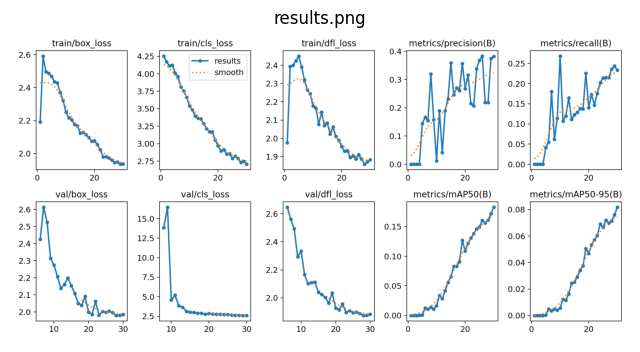

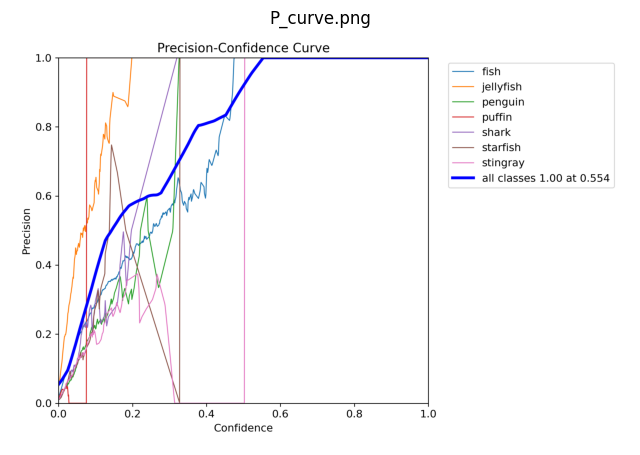

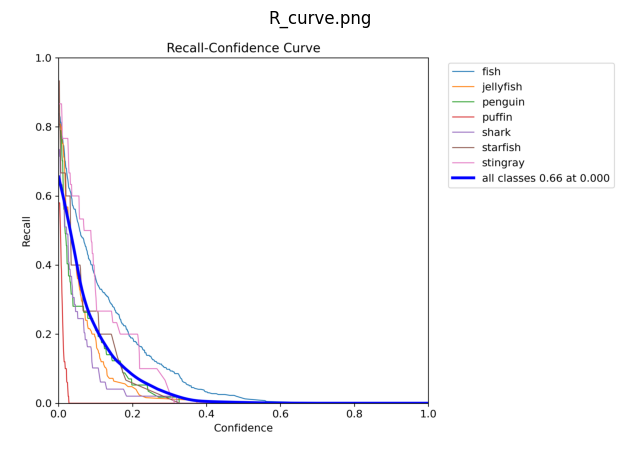

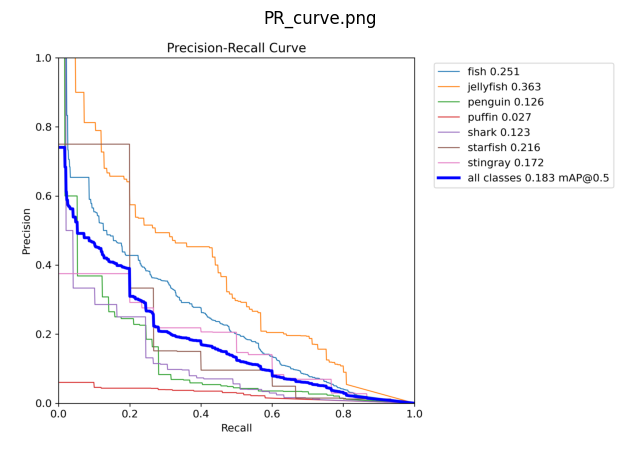

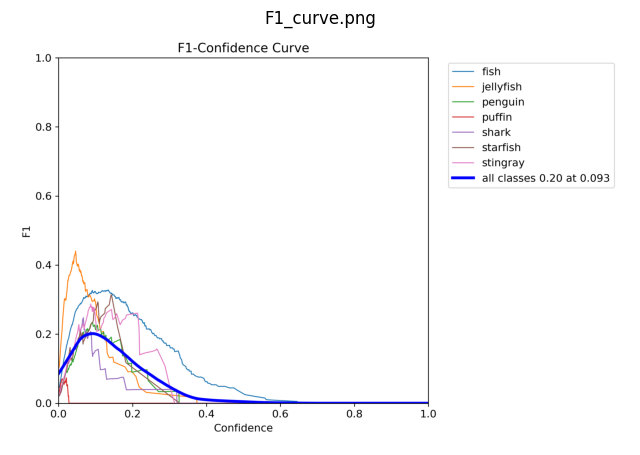

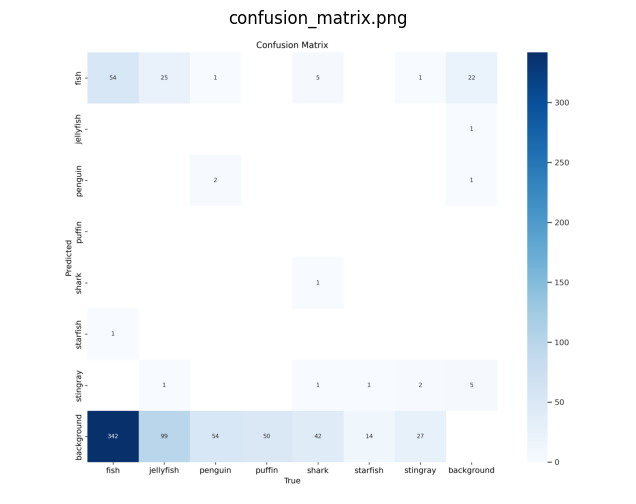

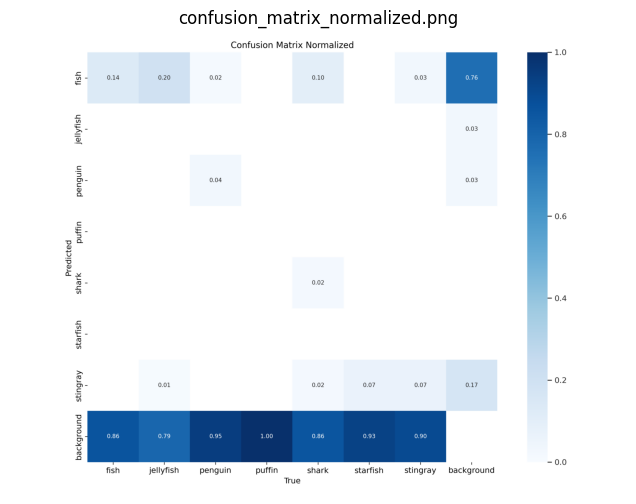

In [48]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Папка с результатами тренировки
save_dir = "/kaggle/working/runs/detect/train3"

# Список файлов, которые хотим отобразить
files = [
    "results.png",                  # общая сводка (loss, mAP50, mAP@[.5:.95])
    "P_curve.png",                  # precision по классам
    "R_curve.png",                  # recall по классам
    "PR_curve.png",                 # суммарная PR-кривая
    "F1_curve.png",                 # F1-кривая
    "confusion_matrix.png",         # матрица ошибок
    "confusion_matrix_normalized.png"  # нормализованная матрица ошибок (если есть)
]

for fname in files:
    path = os.path.join(save_dir, fname)
    if os.path.exists(path):
        img = Image.open(path)
        plt.figure(figsize=(8, 6))
        plt.title(fname)
        plt.imshow(img)
        plt.axis("off")
        plt.show()
    else:
        print(f"⚠️ Файл не найден: {fname}")
